In [1]:
# import libs && tools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# import and handle data
df = pd.read_csv('../data/BOOSTR.cvs')
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna();
df=df.round(decimals=5)  # round to one decimal after precision of devices
#df['diff'] = (df['B_VIMIN'] - df['B:VIMIN'])
#df2= pd.DataFrame({'diff' : df['diff'], 'err' : df['B:IMINER']})

# define period of TLG
horizon = 60.066; # unit: sec. horizon of TLG..61.-- sec
cycle   = 15; # 15Hz sampling
supercycle = 901; # number of time steps per supercycle (60.066 sec)

In [32]:
print(df.keys())

Index(['time', 'file', 'B:ACMNIG', 'B:ACMNPG', 'B:ACMXIG', 'B:ACMXPG',
       'B:DCIG', 'B:DCPG', 'B:GMPS4V', 'B:GMPSBT', 'B:GMPSFF', 'B:IMAXXG',
       'B:IMAXXO', 'B:IMINER', 'B:IMINST', 'B:IMINXG', 'B:IMINXO', 'B:IPHSTC',
       'B:LINFRQ', 'B:NGMPS', 'B:VIMAX', 'B:VIMIN', 'B:VINHBT', 'B:VIPHAS',
       'B_ACMNIG', 'B_ACMNPG', 'B_ACMXIG', 'B_ACMXPG', 'B_DCIG', 'B_DCPG',
       'B_GMPSBT', 'B_GMPSFF', 'B_IMAXXG', 'B_IMAXXO', 'B_IMINST', 'B_IMINXG',
       'B_IMINXO', 'B_IPHSTC', 'B_VIMAX', 'B_VIMIN', 'B_VINHBT', 'B_VIPHAS',
       'I:IB', 'I:MDAT40', 'I:MXIB', 'B:IMINER_ZERO'],
      dtype='object')


<AxesSubplot:>

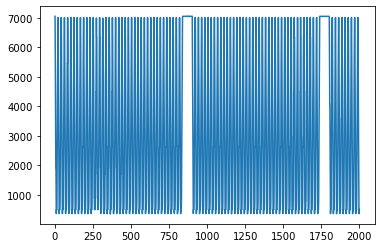

In [34]:
#df["B_VIMIN"][0:200000].plot()
df["I:IB"][0:2000].plot()
#df["B:IMAXER"][0:2000].plot()


In [20]:
df["B:IMINER_ZERO"] = df["B:IMINER"]*0
def regulation(alpha, gamma, df):
  ## calculate the prediction with current regulation rules
  ## from Rachael's report, eq (1)
  beta=[0]
  ER = df["B:IMINER_ZERO"] #error
  #ER = df["B:IMINER"] #error
  _MIN = df["B_VIMIN"] #setting
  for i in range(len(_MIN)):
      if i>0:
          beta_t = beta[-1] + gamma*ER[i]
          beta.append(beta_t)
  MIN_pred = _MIN - alpha * ER - beta #predict the next, shiftting happens in the plotting
  return MIN_pred

The following cell is the eq(1) from Rachael's report, showing the current regulator rules. 2 constances of alpha and gamma are currently fixed.  And we will use RL to dynamically change them. 

103.39315999999995


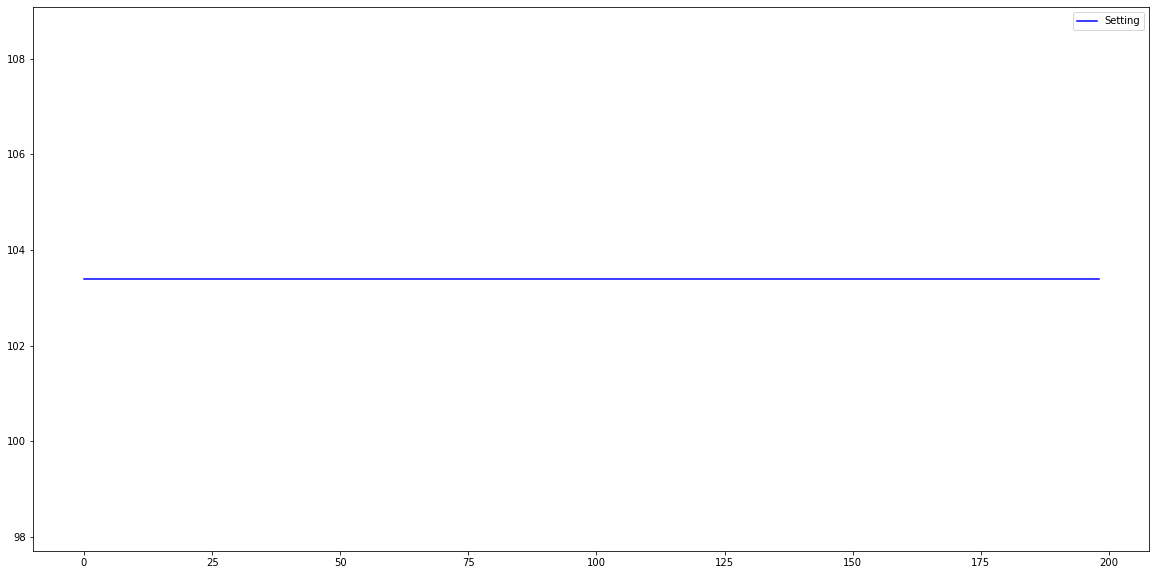

In [29]:
MIN_pred = regulation(10e-2,7.535e-5,df[0:60])
print(MIN_pred.mean())
#MIN_pred_baseline = regulation(8.5e-2,7.535e-5,df)

## actual measurements
MIN = df["B:VIMIN"]

## calculate error
plotStart=0
plotLen = 200#cycle*25#cycle = 1 sec/15 samples; supercycle = 60 cycles
error = (MIN[plotStart:plotLen-1]-MIN_pred[plotStart+1:plotLen]).sem()
#error_baseline=(MIN[plotStart:plotLen-1]-MIN_pred_baseline[plotStart+1:plotLen]).sem()

## plotting
plt.figure(figsize=(20,10))
#MIN_pred_baseline[1:plotLen].plot(label="MIN_pred_baseline")
#MIN_pred[1:plotLen].plot(label="MIN_pred")
#MIN[:plotLen-1].plot(label="MIN_measure")
df["B_VIMIN"][:plotLen-1].plot(label="Setting", c='blue')
plt.legend()
#plt.title("error="+str(error)+'\n'+'error_baseline='+str(error_baseline))